# Building a prediction model for Salary_Data

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
salary_data=pd.read_csv("C:\\Users\\Ayush Namdev\\Desktop\\arpit_assignment\\assignment\\3. Linear Regression\\simple Linear Regression\\Salary_Data.csv")

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary_data.info() #To check the data and missing values in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 544.0 bytes


<AxesSubplot:>

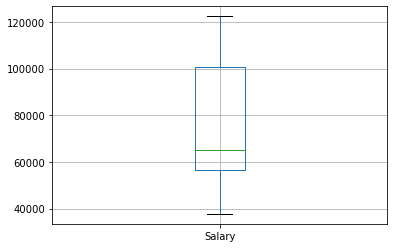

In [6]:
salary_data[['Salary']].boxplot() # To check outliers in salary row

<AxesSubplot:>

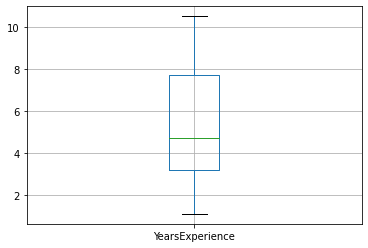

In [7]:
salary_data[['YearsExperience']].boxplot() # To check outliers in YearsExperience row

In [20]:
# to rename the salary data 
salary_data.rename(columns={'YearsExperience':'yexp','Salary':'sal'},inplace=True)

In [9]:
salary_data.head(2)

,yexp,sal
0,1.1,39343.0
1,1.3,46205.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yexp', ylabel='Density'>

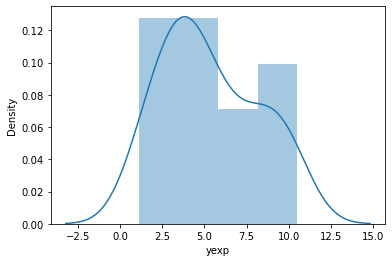

In [21]:
sns.distplot(salary_data.yexp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sal', ylabel='Density'>

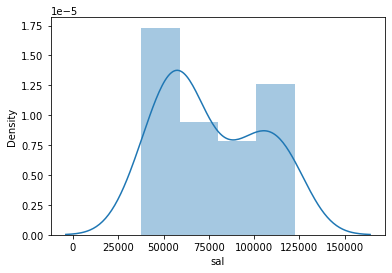

In [22]:
sns.distplot(salary_data.sal)

<AxesSubplot:xlabel='yexp', ylabel='sal'>

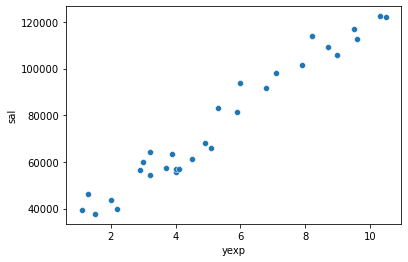

In [32]:
sns.scatterplot(x='yexp',y='sal',data=salary_data) # for scatter plot

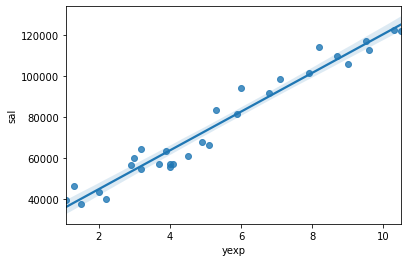

In [31]:
sns.regplot(y='sal', x='yexp', data=salary_data)
plt.show()

In [33]:
salary_data.corr()

,yexp,sal
yexp,1.000000,0.978242
sal,0.978242,1.000000


<AxesSubplot:>

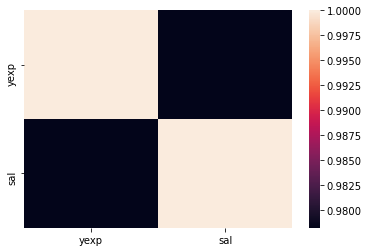

In [34]:
sns.heatmap(salary_data.corr())

# Model1

we are creating a simple model without using any transformation

In [36]:
model1=smf.ols('sal~yexp',data=salary_data).fit()

In [37]:
model1.params

Intercept    25792.200199
yexp          9449.962321
dtype: float64

In [38]:
(model1.tvalues,"\n",model1.pvalues) # P-value should be less than 0.05(5.51e-12) and it is significant

(Intercept    11.346940
 yexp         24.950094
 dtype: float64,
 '\n',
 Intercept    5.511950e-12
 yexp         1.143068e-20
 dtype: float64)

In [40]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        11:26:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yexp        9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
print(model1.conf_int(0.05))
#95% confidence interval
# This code will get us 2 equations 
# 1 to caliculate the lower range and other for upper range

                      0             1
Intercept  21136.061314  30448.339084
yexp        8674.118747  10225.805896


In [42]:
df_yexp=salary_data.iloc[:,:1]

In [43]:
model1.predict(df_yexp) ##Predicted salary for model1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

# Model 2

We may have to do transformation of variables for better R-squared value
Applying transformations
Logarthmic transformation
Regression using logarthmic transformation

In [44]:
model2=smf.ols('sal~np.log(yexp)',data=salary_data).fit()

In [45]:
model2.params

Intercept       14927.97177
np.log(yexp)    40581.98796
dtype: float64

In [46]:
(model2.tvalues,"\n",model2.pvalues) # P-value should be less than 0.05(5.51e-12) it is significant

(Intercept        2.895135
 np.log(yexp)    12.791989
 dtype: float64,
 '\n',
 Intercept       7.268813e-03
 np.log(yexp)    3.250155e-13
 dtype: float64)

In [47]:
model2.summary()
# The R-Squared Value is 0.854 which is greater than 0.8 
# Adjusted R-Squared Value is 0.849
# The P-Value for F-Statistic is 3.25e-13(Overall Probability Model is also less than 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           3.25e-13
Time:                        11:27:04   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(yexp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model2.predict(df_yexp)#model2 predict salary

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

# Model 3
R-squared value for the model2 is 0.854
Adjusted R-squared: 0.849
we may have to do different transformation for a better R-squared value
Applying different transformations
Exponential model


In [49]:
model3=smf.ols('np.log(sal)~yexp',data=salary_data).fit()

In [50]:
model3.params

Intercept    10.507402
yexp          0.125453
dtype: float64

In [51]:
(model3.tvalues,"\n",model3.pvalues) # P-value should be less than 0.05( 1.604634e-49) it is significant

(Intercept    273.327166
 yexp          19.584833
 dtype: float64,
 '\n',
 Intercept    1.604634e-49
 yexp         7.027439e-18
 dtype: float64)

In [52]:
model3.summary()
# R-squared value - 0.932
# Adjusted R SQuare Value - 0.930

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           7.03e-18
Time:                        11:27:20   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
yexp           0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
np.exp(model3.predict(df_yexp))#model3 predict salary

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

# Model 4
R-squared value for the model3 is 0.932
Adjusted R-squared: 0.930
Higher the R-sqaured value - Better chances of getting good model for Salary hike and Years of Experience
Qurdratic model

In [55]:
model4=smf.ols('sal~yexp+np.square(yexp)',data=salary_data).fit()

In [56]:
model4.params

Intercept          26214.932677
yexp                9259.283888
np.square(yexp)       16.392566
dtype: float64

In [57]:
(model4.tvalues,"\n",model4.pvalues) # P-value should be less than 0.05( 0.000004) it is significant

(Intercept          5.755611
 yexp               5.112783
 np.square(yexp)    0.107760
 dtype: float64,
 '\n',
 Intercept          0.000004
 yexp               0.000022
 np.square(yexp)    0.914983
 dtype: float64)

In [58]:
model4.summary()
# The R-Squared Value is 0.957 which is greater than 0.8
# Adjusted R-Squared Value is 0.954 
# The P-Value for F-Statistic is 3.59e-19(Overall Probability Model is also less than 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           3.59e-19
Time:                        11:27:41   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
yexp             9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
np.square(yexp)    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model4.predict(df_yexp)#model4 predict salary

0      36419.979959
1      38279.705169
2      40140.741784
3      44799.070719
4      46664.697252
5      53204.717436
6      54140.317439
7      56012.500998
8      56012.500998
9      60698.697296
10     62575.470775
11     63514.349291
12     63514.349291
13     64453.555659
14     68213.659642
15     71979.009247
16     73863.651157
17     75749.604472
18     81415.332851
19     82360.768394
20     89936.055383
21     92782.197551
22    100386.335458
23    103243.296720
24    108011.455849
25    110876.285543
26    115657.558725
27    116614.796916
28    123324.644086
29    125244.693940
dtype: float64

# Model 5
R-squared value for the model4 is 0.957
Adjusted R-squared: 0.954
Higher the R-sqaured value - Better chances of getting good model for Salary hike and Years of Experience
Cubic model

In [60]:
model5=smf.ols('sal~yexp+np.square(yexp)*yexp',data=salary_data).fit()

In [ ]:
(model5.tvalues,"\n",model5.pvalues) # P-value should be less than 0.05(0.000012) it is significant

In [61]:
model5.summary()
# The R-Squared Value is 0.964 which is greater than 0.8
# Adjusted R-Squared Value is 0.959
# The P-Value for F-Statistic is 8.11e-19(Overall Probability Model is also less than 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     229.4
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           8.11e-19
Time:                        11:27:53   Log-Likelihood:                -298.93
No. Observations:                  30   AIC:                             605.9
Df Residuals:                      26   BIC:                             611.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.886e+04   7214.747      5.387      0.000     2.4e+04    5.37e+04
yexp                  -718.7084   4892.111     -0.147      0.884   -1.08e+04    9337.171
np.square(yexp)       2099.3519    968.355      2.168      0.040     108.869    4089.835
np.square(yexp):yexp  -122.9154     56.520     -2.175      0.039    -239.093      -6.737
==============================================================================
Omnibus:                        2.261   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.849
Skew:                           0.470   Prob(JB):                        0.397
Kurtosis:                       2.228   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
pred=model5.predict(df_yexp)#model5 predict salary

In [64]:
np.sqrt(np.mean((salary_data.sal-pred)**2)) ##Error also less in this model

5142.642278716045

# Conclusion:-Model5(Cubic transformation) is best model 

 R-squared value - 0.964 is higher than other model
 Higher the R-sqaured value - Better chances of getting good model for Delivery  Time and Sorting Time